In [29]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import pandas as pd
import numpy as np
import random
import nltk
import re


import matplotlib.pyplot as plt
from ipywidgets import interactive

import seaborn as sns
from seaborn import lmplot, stripplot
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

import nltk
from nltk.stem import WordNetLemmatizer 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TOttun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TOttun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\TOttun\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\TOttun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
np.random.seed(500)

In [32]:
Corpus = pd.read_csv("Data_hudoc_cases.csv",encoding='latin-1')

In [33]:
Corpus.head(5)

,url,language,title,JUDGMENT,introduction,Facts,The Law,releavent legal framework,Unanimously,courts_assesment,Admissibility
0,"https://hudoc.echr.coe.int/eng/#{""tabview"":[""d...",English,CASE OF NEGOVANOVIÄ AND OTHERS v. SERBIA (App...,Art 1 P12 â¢ Prohibition of discrimination â...,"1., , ,The applications concern alleged discri...","2,., , ,A list of the applicants is set out in...",",joinder of the applications,43., , ,H...","The ,Sporting Achievements Recognition and Rew...",",Decides,, unanimously, to join the applicati...",NaN,"(a), ,The Courtâs jurisdiction ,ratione ma..."
1,"https://hudoc.echr.coe.int/eng/#{""tabview"":[""d...",English,CASE OF BEG S.P.A. v. ITALY (Application no. ...,",Art 6 Â§ 1 (civil) â¢ Impartial tribunal â...","1., , ,The case concerns, under Article 6 Â§ 1...","2., , ,The applicant is an Italian company, wh...",NaN,"Relevant domestic law,38., , ,The Court of Cas...","Declares, the application admissible;,Holds, t...","125., , ,The Court reiterates that Article 6 Â...","Whether the Court has jurisdiction ,ratione pe..."
2,"https://hudoc.echr.coe.int/eng#{""itemid"":[""001...",English,CASE OF ADVANCE PHARMA SP. Z O.O v. POLAND (Ap...,Art 6 (civil) â Tribunal established by law ...,"1., , ,The applicant company had its cassation...",NaN,NaN,NaN,"Joins ,to the merits the Governmentâs prelim...",NaN,"Exhaustion of domestic remedies,(a), ,The pa..."
3,"https://hudoc.echr.coe.int/eng#{""itemid"":[""001...",English,CASE OF KOMISSAROV v. THE CZECH REPUBLIC (Appl...,",Art 5 Â§ 1 (f) â¢ Extradition â¢ Excessive...","1., , ,The application concerns in particular ...","2., , ,The applicant was born in 1968. He live...","PRELIMINARY REMARKS,34., , ,In his claims for ...",LAW NO. 104/2013 ON INTERNATIONAL JUDICIAL COO...,"Declares, the complaint under Article 5 Â§ 1 (...",NaN,"40., , ,The Government accepted that the appli..."
4,"https://hudoc.echr.coe.int/eng#{""itemid"":[""001...",English,CASE OF Å EKS v. CROATIA (Application no. 393...,",Art 10 â¢ Freedom to impart information â¢...","1., , ,The applicant requested access to the c...","2., , ,The applicant was born in 1943 and live...",ALLEGED VIOLATION OF ARTICLE 10 OF THE CONVENT...,"Relevant domestic law,20., , ,The relevant pro...","Declares, the application admissible;,Holds, t...",NaN,"Compatibility ,ratione materiae,(a), ,The pa..."


In [34]:
Corpus.shape

(12271, 11)

In [35]:
Corpus.columns

Index(['url', 'language', 'title', 'JUDGMENT', 'introduction', 'Facts',
       'The Law', 'releavent legal framework', 'Unanimously',
       'courts_assesment', 'Admissibility'],
      dtype='object')

In [36]:
Corpus.dtypes

url                          object
language                     object
title                        object
JUDGMENT                     object
introduction                 object
Facts                        object
The Law                      object
releavent legal framework    object
Unanimously                  object
courts_assesment             object
Admissibility                object
dtype: object

In [37]:
Corpus.describe(include="all")

,url,language,title,JUDGMENT,introduction,Facts,The Law,releavent legal framework,Unanimously,courts_assesment,Admissibility
count,11214,12196,11078,9796,4910,7094,8806,4515,9910,3215,6985
unique,4601,17,2201,1063,480,1298,2245,450,2167,724,1542
top,"https://hudoc.echr.coe.int/eng/#{""tabview"":[""d...",English,CASE OF,",","1., , ,The present case concerns the death of ...","2., , ,The first applicant is an association r...",ALLEGED VIOLATION OF ARTICLE 6 OF THE CONVENTI...,"Relevant domestic law and practice,Liability f...","Declares, the application admissible;,Holds, t...","90., , ,It is now well established that althou...","31., , ,The Court notes that the application i..."
freq,15,11582,885,1812,45,28,24,28,40,24,36


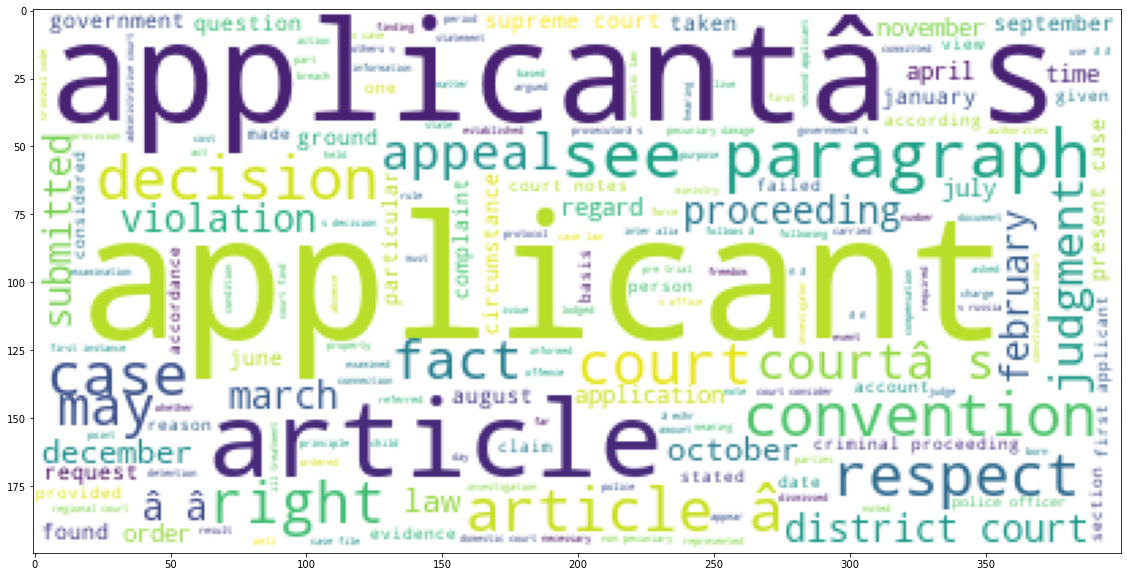

In [38]:
import re
from wordcloud import WordCloud, STOPWORDS

# Remove punctuation
Corpus['Facts'] = Corpus['Facts'].astype('str') 
Corpus['Facts_proc'] = \
Corpus['Facts'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
Corpus['Facts_proc'] = \
Corpus['Facts_proc'].map(lambda x: x.lower())

# Print out the first rows of papers
Corpus['Facts_proc'].head()


# Join the different processed titles together.
long_string = ','.join(list(Corpus['Facts_proc'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, 
contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.show()

In [39]:
Corpus['url'].dropna(how='all', inplace=True)
Corpus = Corpus.applymap(str)

In [60]:
df = Corpus[~Corpus['Facts_proc'].isna()]
df.fillna(0)
df.head()

,url,language,title,JUDGMENT,introduction,Facts,The Law,releavent legal framework,Unanimously,courts_assesment,Admissibility,Facts_proc
0,"https://hudoc.echr.coe.int/eng/#{""tabview"":[""d...",English,CASE OF NEGOVANOVIÄ AND OTHERS v. SERBIA (App...,Art 1 P12 â¢ Prohibition of discrimination â...,"1., , ,The applications concern alleged discri...","2,., , ,A list of the applicants is set out in...",",joinder of the applications,43., , ,H...","The ,Sporting Achievements Recognition and Rew...",",Decides,, unanimously, to join the applicati...",nan,"(a), ,The Courtâs jurisdiction ,ratione ma...",2 a list of the applicants is set out in the ...
1,"https://hudoc.echr.coe.int/eng/#{""tabview"":[""d...",English,CASE OF BEG S.P.A. v. ITALY (Application no. ...,",Art 6 Â§ 1 (civil) â¢ Impartial tribunal â...","1., , ,The case concerns, under Article 6 Â§ 1...","2., , ,The applicant is an Italian company, wh...",nan,"Relevant domestic law,38., , ,The Court of Cas...","Declares, the application admissible;,Holds, t...","125., , ,The Court reiterates that Article 6 Â...","Whether the Court has jurisdiction ,ratione pe...",2 the applicant is an italian company which w...
2,"https://hudoc.echr.coe.int/eng#{""itemid"":[""001...",English,CASE OF ADVANCE PHARMA SP. Z O.O v. POLAND (Ap...,Art 6 (civil) â Tribunal established by law ...,"1., , ,The applicant company had its cassation...",nan,nan,nan,"Joins ,to the merits the Governmentâs prelim...",nan,"Exhaustion of domestic remedies,(a), ,The pa...",nan
3,"https://hudoc.echr.coe.int/eng#{""itemid"":[""001...",English,CASE OF KOMISSAROV v. THE CZECH REPUBLIC (Appl...,",Art 5 Â§ 1 (f) â¢ Extradition â¢ Excessive...","1., , ,The application concerns in particular ...","2., , ,The applicant was born in 1968. He live...","PRELIMINARY REMARKS,34., , ,In his claims for ...",LAW NO. 104/2013 ON INTERNATIONAL JUDICIAL COO...,"Declares, the complaint under Article 5 Â§ 1 (...",nan,"40., , ,The Government accepted that the appli...",2 the applicant was born in 1968 he lives in ...
4,"https://hudoc.echr.coe.int/eng#{""itemid"":[""001...",English,CASE OF Å EKS v. CROATIA (Application no. 393...,",Art 10 â¢ Freedom to impart information â¢...","1., , ,The applicant requested access to the c...","2., , ,The applicant was born in 1943 and live...",ALLEGED VIOLATION OF ARTICLE 10 OF THE CONVENT...,"Relevant domestic law,20., , ,The relevant pro...","Declares, the application admissible;,Holds, t...",nan,"Compatibility ,ratione materiae,(a), ,The pa...",2 the applicant was born in 1943 and lives in...


In [61]:
print(df.shape)

(12271, 12)


In [62]:
# Label a case if it violated an article or not
violations =[]
df['label'] = ''
for i,x in df.Unanimously.iteritems():
    is_violation = re.search('has been a violation of ', x)
    if is_violation:
        df['label'][i] = 1
    else:
        df['label'][i] = 0

int64


C:\Users\TOttun\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='label'>

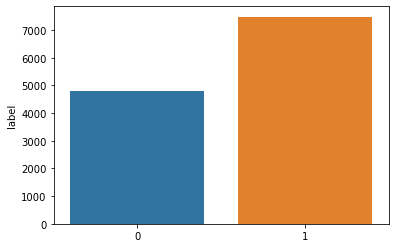

In [63]:
x = df['label'].value_counts()
print(x.dtype)
sns.barplot(x.index, x)

1
<class 'int'>
6
<class 'int'>
6
<class 'int'>
5
<class 'int'>
3
<class 'int'>
2
<class 'int'>
8
<class 'int'>
3
<class 'int'>
2
<class 'int'>
8
<class 'int'>
9
<class 'int'>
6
<class 'int'>
8
<class 'int'>
2
<class 'int'>
14
<class 'int'>
6
<class 'int'>
8
<class 'int'>
8
<class 'int'>
5
<class 'int'>
3
<class 'int'>
8
<class 'int'>
8
<class 'int'>
8
<class 'int'>
1
<class 'int'>
10
<class 'int'>
9
<class 'int'>
1
<class 'int'>
8
<class 'int'>
9
<class 'int'>
10
<class 'int'>
8
<class 'int'>
8
<class 'int'>
2
<class 'int'>
2
<class 'int'>
8
<class 'int'>
10
<class 'int'>
6
<class 'int'>
8
<class 'int'>
3
<class 'int'>
10
<class 'int'>
8
<class 'int'>
6
<class 'int'>
10
<class 'int'>
10
<class 'int'>
6
<class 'int'>
4
<class 'int'>
4
<class 'int'>
8
<class 'int'>
6
<class 'int'>
2
<class 'int'>
4
<class 'int'>
3
<class 'int'>
1
<class 'int'>
6
<class 'int'>
5
<class 'int'>
3
<class 'int'>
6
<class 'int'>
5
<class 'int'>
1
<class 'int'>
14
<class 'int'>
1
<class 'int'>
8
<class 'int'>


8
<class 'int'>
8
<class 'int'>
8
<class 'int'>
5
<class 'int'>
1
<class 'int'>
1
<class 'int'>
8
<class 'int'>
11
<class 'int'>
2
<class 'int'>
8
<class 'int'>
8
<class 'int'>
2
<class 'int'>
11
<class 'int'>
8
<class 'int'>
8
<class 'int'>
8
<class 'int'>
10
<class 'int'>
8
<class 'int'>
6
<class 'int'>
3
<class 'int'>
6
<class 'int'>
5
<class 'int'>
3
<class 'int'>
3
<class 'int'>
5
<class 'int'>
6
<class 'int'>
3
<class 'int'>
3
<class 'int'>
5
<class 'int'>
3
<class 'int'>
3
<class 'int'>
6
<class 'int'>
14
<class 'int'>
2
<class 'int'>
14
<class 'int'>
6
<class 'int'>
1
<class 'int'>
5
<class 'int'>
5
<class 'int'>
5
<class 'int'>
5
<class 'int'>
5
<class 'int'>
1
<class 'int'>
5
<class 'int'>
6
<class 'int'>
6
<class 'int'>
6
<class 'int'>
8
<class 'int'>
8
<class 'int'>
8
<class 'int'>
4
<class 'int'>
8
<class 'int'>
6
<class 'int'>
6
<class 'int'>
6
<class 'int'>
4
<class 'int'>
8
<class 'int'>
8
<class 'int'>
5
<class 'int'>
6
<class 'int'>
6
<class 'int'>
3
<class 'int'>
5
<

6
<class 'int'>
1
<class 'int'>
8
<class 'int'>
3
<class 'int'>
6
<class 'int'>
6
<class 'int'>
8
<class 'int'>
3
<class 'int'>
3
<class 'int'>
1
<class 'int'>
3
<class 'int'>
5
<class 'int'>
3
<class 'int'>
3
<class 'int'>
3
<class 'int'>
3
<class 'int'>
5
<class 'int'>
2
<class 'int'>
4
<class 'int'>
6
<class 'int'>
3
<class 'int'>
3
<class 'int'>
6
<class 'int'>
11
<class 'int'>
6
<class 'int'>
6
<class 'int'>
6
<class 'int'>
6
<class 'int'>
6
<class 'int'>
6
<class 'int'>
11
<class 'int'>
6
<class 'int'>
6
<class 'int'>
6
<class 'int'>
3
<class 'int'>
2
<class 'int'>
8
<class 'int'>
11
<class 'int'>
8
<class 'int'>
2
<class 'int'>
11
<class 'int'>
6
<class 'int'>
6
<class 'int'>
6
<class 'int'>
6
<class 'int'>
1
<class 'int'>
3
<class 'int'>
6
<class 'int'>
9
<class 'int'>
1
<class 'int'>
9
<class 'int'>
2
<class 'int'>
10
<class 'int'>
10
<class 'int'>
8
<class 'int'>
10
<class 'int'>
6
<class 'int'>
6
<class 'int'>
6
<class 'int'>
1
<class 'int'>
6
<class 'int'>
2
<class 'int'>
6

10
<class 'int'>
4
<class 'int'>
2
<class 'int'>
14
<class 'int'>
6
<class 'int'>
6
<class 'int'>
2
<class 'int'>
2
<class 'int'>
5
<class 'int'>
6
<class 'int'>
8
<class 'int'>
6
<class 'int'>
2
<class 'int'>
10
<class 'int'>
1
<class 'int'>
1
<class 'int'>
3
<class 'int'>
8
<class 'int'>
1
<class 'int'>
4
<class 'int'>
1
<class 'int'>
5
<class 'int'>
6
<class 'int'>
6
<class 'int'>
2
<class 'int'>
5
<class 'int'>
8
<class 'int'>
1
<class 'int'>
5
<class 'int'>
6
<class 'int'>
8
<class 'int'>
6
<class 'int'>
8
<class 'int'>
2
<class 'int'>
8
<class 'int'>
6
<class 'int'>
2
<class 'int'>
5
<class 'int'>
8
<class 'int'>
14
<class 'int'>
14
<class 'int'>
8
<class 'int'>
3
<class 'int'>
8
<class 'int'>
8
<class 'int'>
6
<class 'int'>
8
<class 'int'>
1
<class 'int'>
9
<class 'int'>
3
<class 'int'>
6
<class 'int'>
10
<class 'int'>
5
<class 'int'>
8
<class 'int'>
3
<class 'int'>
9
<class 'int'>
10
<class 'int'>
6
<class 'int'>
5
<class 'int'>
8
<class 'int'>
2
<class 'int'>
8
<class 'int'>
6

4
<class 'int'>
6
<class 'int'>
6
<class 'int'>
6
<class 'int'>
4
<class 'int'>
13
<class 'int'>
5
<class 'int'>
1
<class 'int'>
3
<class 'int'>
1
<class 'int'>
6
<class 'int'>
6
<class 'int'>
3
<class 'int'>
1
<class 'int'>
1
<class 'int'>
1
<class 'int'>
1
<class 'int'>
3
<class 'int'>
8
<class 'int'>
5
<class 'int'>
3
<class 'int'>
6
<class 'int'>
3
<class 'int'>
3
<class 'int'>
3
<class 'int'>
5
<class 'int'>
3
<class 'int'>
3
<class 'int'>
8
<class 'int'>
3
<class 'int'>
6
<class 'int'>
3
<class 'int'>
9
<class 'int'>
6
<class 'int'>
6
<class 'int'>
4
<class 'int'>
1
<class 'int'>
8
<class 'int'>
4
<class 'int'>
9
<class 'int'>
4
<class 'int'>
6
<class 'int'>
8
<class 'int'>
4
<class 'int'>
6
<class 'int'>
8
<class 'int'>
6
<class 'int'>
1
<class 'int'>
10
<class 'int'>
6
<class 'int'>
10
<class 'int'>
3
<class 'int'>
3
<class 'int'>
3
<class 'int'>
3
<class 'int'>
3
<class 'int'>
3
<class 'int'>
3
<class 'int'>
2
<class 'int'>
2
<class 'int'>
2
<class 'int'>
9
<class 'int'>
5
<cl

3
<class 'int'>
2
<class 'int'>
11
<class 'int'>
8
<class 'int'>
5
<class 'int'>
6
<class 'int'>
8
<class 'int'>
3
<class 'int'>
8
<class 'int'>
3
<class 'int'>
10
<class 'int'>
6
<class 'int'>
6
<class 'int'>
3
<class 'int'>
10
<class 'int'>
1
<class 'int'>
1
<class 'int'>
6
<class 'int'>
6
<class 'int'>
1
<class 'int'>
8
<class 'int'>
1
<class 'int'>
1
<class 'int'>
3
<class 'int'>
1
<class 'int'>
8
<class 'int'>
6
<class 'int'>
6
<class 'int'>
3
<class 'int'>
6
<class 'int'>
6
<class 'int'>
8
<class 'int'>
14
<class 'int'>
6
<class 'int'>
6
<class 'int'>
3
<class 'int'>
3
<class 'int'>
1
<class 'int'>
3
<class 'int'>
6
<class 'int'>
2
<class 'int'>
3
<class 'int'>
2
<class 'int'>
2
<class 'int'>
3
<class 'int'>
6
<class 'int'>
2
<class 'int'>
2
<class 'int'>
2
<class 'int'>
6
<class 'int'>
3
<class 'int'>
1
<class 'int'>
8
<class 'int'>
8
<class 'int'>
8
<class 'int'>
2
<class 'int'>
8
<class 'int'>
3
<class 'int'>
8
<class 'int'>
8
<class 'int'>
2
<class 'int'>
2
<class 'int'>
8
<c

6
<class 'int'>
6
<class 'int'>
14
<class 'int'>
10
<class 'int'>
6
<class 'int'>
3
<class 'int'>
2
<class 'int'>
8
<class 'int'>
6
<class 'int'>
5
<class 'int'>
8
<class 'int'>
6
<class 'int'>
14
<class 'int'>
8
<class 'int'>
3
<class 'int'>
6
<class 'int'>
3
<class 'int'>
6
<class 'int'>
3
<class 'int'>
6
<class 'int'>
8
<class 'int'>
8
<class 'int'>
8
<class 'int'>
8
<class 'int'>
5
<class 'int'>
8
<class 'int'>
2
<class 'int'>
6
<class 'int'>
8
<class 'int'>
6
<class 'int'>
6
<class 'int'>
5
<class 'int'>
5
<class 'int'>
6
<class 'int'>
1
<class 'int'>
6
<class 'int'>
6
<class 'int'>
6
<class 'int'>
10
<class 'int'>
8
<class 'int'>
1
<class 'int'>
6
<class 'int'>
7
<class 'int'>
14
<class 'int'>
6
<class 'int'>
6
<class 'int'>
6
<class 'int'>
3
<class 'int'>
5
<class 'int'>
3
<class 'int'>
6
<class 'int'>
1
<class 'int'>
6
<class 'int'>
8
<class 'int'>
8
<class 'int'>
8
<class 'int'>
8
<class 'int'>
2
<class 'int'>
5
<class 'int'>
2
<class 'int'>
2
<class 'int'>
2
<class 'int'>
1
<

14
<class 'int'>
1
<class 'int'>
5
<class 'int'>
11
<class 'int'>
10
<class 'int'>
10
<class 'int'>
1
<class 'int'>
5
<class 'int'>
1
<class 'int'>
11
<class 'int'>
10
<class 'int'>
4
<class 'int'>
1
<class 'int'>
6
<class 'int'>
2
<class 'int'>
2
<class 'int'>
1
<class 'int'>
6
<class 'int'>
4
<class 'int'>
6
<class 'int'>
2
<class 'int'>
10
<class 'int'>
8
<class 'int'>
5
<class 'int'>
10
<class 'int'>
6
<class 'int'>
1
<class 'int'>
8
<class 'int'>
8
<class 'int'>
8
<class 'int'>
2
<class 'int'>
8
<class 'int'>
5
<class 'int'>
8
<class 'int'>
8
<class 'int'>
8
<class 'int'>
8
<class 'int'>
8
<class 'int'>
8
<class 'int'>
2
<class 'int'>
3
<class 'int'>
6
<class 'int'>
1
<class 'int'>
2
<class 'int'>
8
<class 'int'>
3
<class 'int'>
6
<class 'int'>
1
<class 'int'>
1
<class 'int'>
13
<class 'int'>
3
<class 'int'>
5
<class 'int'>
2
<class 'int'>
2
<class 'int'>
6
<class 'int'>
8
<class 'int'>
3
<class 'int'>
1
<class 'int'>
8
<class 'int'>
2
<class 'int'>
2
<class 'int'>
5
<class 'int'>

6
<class 'int'>
8
<class 'int'>
5
<class 'int'>
3
<class 'int'>
6
<class 'int'>
8
<class 'int'>
3
<class 'int'>
14
<class 'int'>
6
<class 'int'>
6
<class 'int'>
6
<class 'int'>
5
<class 'int'>
6
<class 'int'>
5
<class 'int'>
3
<class 'int'>
1
<class 'int'>
3
<class 'int'>
8
<class 'int'>
3
<class 'int'>
3
<class 'int'>
2
<class 'int'>
5
<class 'int'>
3
<class 'int'>
8
<class 'int'>
3
<class 'int'>
2
<class 'int'>
8
<class 'int'>
13
<class 'int'>
11
<class 'int'>
3
<class 'int'>
2
<class 'int'>
3
<class 'int'>
13
<class 'int'>
13
<class 'int'>
2
<class 'int'>
11
<class 'int'>
3
<class 'int'>
3
<class 'int'>
3
<class 'int'>
4
<class 'int'>
3
<class 'int'>
8
<class 'int'>
8
<class 'int'>
1
<class 'int'>
10
<class 'int'>
2
<class 'int'>
1
<class 'int'>
3
<class 'int'>
2
<class 'int'>
5
<class 'int'>
2
<class 'int'>
5
<class 'int'>
3
<class 'int'>
2
<class 'int'>
6
<class 'int'>
5
<class 'int'>
8
<class 'int'>
2
<class 'int'>
6
<class 'int'>
3
<class 'int'>
8
<class 'int'>
3
<class 'int'>
3

3
<class 'int'>
5
<class 'int'>
3
<class 'int'>
3
<class 'int'>
6
<class 'int'>
5
<class 'int'>
3
<class 'int'>
3
<class 'int'>
1
<class 'int'>
5
<class 'int'>
3
<class 'int'>
6
<class 'int'>
6
<class 'int'>
8
<class 'int'>
6
<class 'int'>
3
<class 'int'>
8
<class 'int'>
6
<class 'int'>
8
<class 'int'>
3
<class 'int'>
10
<class 'int'>
6
<class 'int'>
1
<class 'int'>
5
<class 'int'>
3
<class 'int'>
1
<class 'int'>
6
<class 'int'>
3
<class 'int'>
3
<class 'int'>
6
<class 'int'>
3
<class 'int'>
3
<class 'int'>
5
<class 'int'>
5
<class 'int'>
5
<class 'int'>
3
<class 'int'>
6
<class 'int'>
6
<class 'int'>
6
<class 'int'>
8
<class 'int'>
3
<class 'int'>
6
<class 'int'>
6
<class 'int'>
6
<class 'int'>
8
<class 'int'>
8
<class 'int'>
2
<class 'int'>
13
<class 'int'>
6
<class 'int'>
3
<class 'int'>
10
<class 'int'>
3
<class 'int'>
3
<class 'int'>
13
<class 'int'>
6
<class 'int'>
5
<class 'int'>
3
<class 'int'>
3
<class 'int'>
8
<class 'int'>
3
<class 'int'>
1
<class 'int'>
5
<class 'int'>
5
<c

3
<class 'int'>
3
<class 'int'>
8
<class 'int'>
10
<class 'int'>
1
<class 'int'>
6
<class 'int'>
6
<class 'int'>
6
<class 'int'>
12
<class 'int'>
6
<class 'int'>
3
<class 'int'>
12
<class 'int'>
11
<class 'int'>
10
<class 'int'>
5
<class 'int'>
5
<class 'int'>
5
<class 'int'>
10
<class 'int'>
5
<class 'int'>
6
<class 'int'>
1
<class 'int'>
5
<class 'int'>
5
<class 'int'>
5
<class 'int'>
8
<class 'int'>
1
<class 'int'>
2
<class 'int'>
2
<class 'int'>
4
<class 'int'>
4
<class 'int'>
13
<class 'int'>
2
<class 'int'>
1
<class 'int'>
1
<class 'int'>
6
<class 'int'>
6
<class 'int'>
1
<class 'int'>
8
<class 'int'>
2
<class 'int'>
1
<class 'int'>
8
<class 'int'>
13
<class 'int'>
10
<class 'int'>
10
<class 'int'>
13
<class 'int'>
6
<class 'int'>
8
<class 'int'>
3
<class 'int'>
10
<class 'int'>
9
<class 'int'>
8
<class 'int'>
1
<class 'int'>
10
<class 'int'>
10
<class 'int'>
14
<class 'int'>
8
<class 'int'>
1
<class 'int'>
3
<class 'int'>
6
<class 'int'>
1
<class 'int'>
3
<class 'int'>
13
<class

6
<class 'int'>
6
<class 'int'>
3
<class 'int'>
1
<class 'int'>
2
<class 'int'>
3
<class 'int'>
6
<class 'int'>
6
<class 'int'>
6
<class 'int'>
2
<class 'int'>
3
<class 'int'>
1
<class 'int'>
2
<class 'int'>
3
<class 'int'>
3
<class 'int'>
2
<class 'int'>
10
<class 'int'>
9
<class 'int'>
9
<class 'int'>
3
<class 'int'>
6
<class 'int'>
6
<class 'int'>
6
<class 'int'>
3
<class 'int'>
3
<class 'int'>
3
<class 'int'>
6
<class 'int'>
6
<class 'int'>
3
<class 'int'>
5
<class 'int'>
8
<class 'int'>
5
<class 'int'>
5
<class 'int'>
2
<class 'int'>
3
<class 'int'>
1
<class 'int'>
3
<class 'int'>
2
<class 'int'>
3
<class 'int'>
3
<class 'int'>
1
<class 'int'>
1
<class 'int'>
3
<class 'int'>
6
<class 'int'>
6
<class 'int'>
5
<class 'int'>
5
<class 'int'>
6
<class 'int'>
6
<class 'int'>
8
<class 'int'>
8
<class 'int'>
8
<class 'int'>
8
<class 'int'>
8
<class 'int'>
8
<class 'int'>
6
<class 'int'>
11
<class 'int'>
6
<class 'int'>
3
<class 'int'>
6
<class 'int'>
6
<class 'int'>
11
<class 'int'>
11
<c

2
<class 'int'>
8
<class 'int'>
3
<class 'int'>
2
<class 'int'>
3
<class 'int'>
1
<class 'int'>
9
<class 'int'>
3
<class 'int'>
10
<class 'int'>
1
<class 'int'>
6
<class 'int'>
8
<class 'int'>
9
<class 'int'>
6
<class 'int'>
5
<class 'int'>
8
<class 'int'>
2
<class 'int'>
14
<class 'int'>
3
<class 'int'>
8
<class 'int'>
4
<class 'int'>
8
<class 'int'>
4
<class 'int'>
3
<class 'int'>
8
<class 'int'>
1
<class 'int'>
8
<class 'int'>
9
<class 'int'>
10
<class 'int'>
10
<class 'int'>
2
<class 'int'>
8
<class 'int'>
10
<class 'int'>
3
<class 'int'>
6
<class 'int'>
3
<class 'int'>
10
<class 'int'>
6
<class 'int'>
6
<class 'int'>
10
<class 'int'>
6
<class 'int'>
6
<class 'int'>
4
<class 'int'>
2
<class 'int'>
6
<class 'int'>
1
<class 'int'>
1
<class 'int'>
6
<class 'int'>
8
<class 'int'>
5
<class 'int'>
5
<class 'int'>
11
<class 'int'>
6
<class 'int'>
8
<class 'int'>
1
<class 'int'>
8
<class 'int'>
5
<class 'int'>
10
<class 'int'>
11
<class 'int'>
10
<class 'int'>
1
<class 'int'>
1
<class 'int

C:\Users\TOttun\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Articles_Violated'>

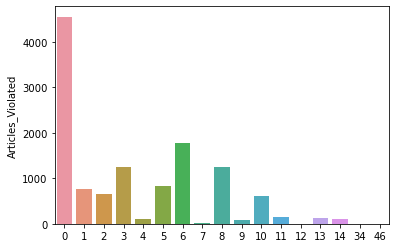

In [107]:
# Label a case by what article(s) it violated

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Remove punctuation from Unanimously
df['Unanimously_proc'] = \
df['Unanimously'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert Unanimously to lowercase
df['Unanimously_proc'] = \
df['Unanimously_proc'].map(lambda x: x.lower())

articles_violated = []

for i, x in df.Unanimously_proc.iteritems():
    p = re.compile("has been a violation of ([^;]*);*")
    result = p.search(x)
    if result:
        match = result.group(1)
        word_list = nltk.word_tokenize(match)     
        lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
        article_match = re.search('article (\d+)', lemmatized_output)
        if article_match:
            articles = int(article_match.group(1))
            articles_violated.append(articles)
        else:
            articles_violated.append(0)
    else:
        articles_violated.append(0)
        
df['Articles_Violated'] = articles_violated
df['Articles_Violated'].apply(int)
x = df['Articles_Violated'].value_counts()
sns.barplot(x.index, x)

In [87]:
# WORD-COUNT
df['word_count'] = df['Facts_proc'].apply(lambda x: len(str(x).split()))
print(df[df['label']==1]['word_count'].mean()) #Violated Cases
print(df[df['label']==0]['word_count'].mean()) #UnViolated Cases

2501.1634152859433
1174.2914142469187


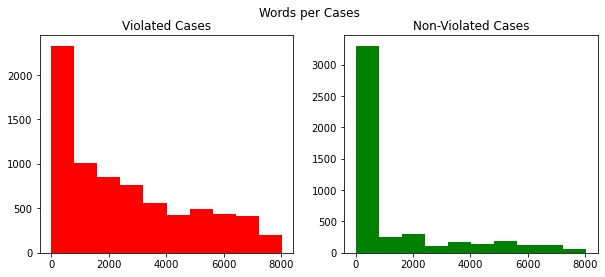

In [88]:
# PLOTTING WORD-COUNT
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(10,4))
Corpus_words = df[df['label']==1]['word_count']
ax1.hist(Corpus_words,color='red')
ax1.set_title('Violated Cases')
Corpus_words=df[df['label']==0]['word_count']
ax2.hist(Corpus_words, color='green')
ax2.set_title('Non-Violated Cases')
fig.suptitle('Words per Cases')
plt.show()

In [89]:
df.head()

,url,language,title,JUDGMENT,introduction,Facts,The Law,releavent legal framework,Unanimously,courts_assesment,Admissibility,Facts_proc,label,Unanimously_proc,Articles_Violated,word_count
0,"https://hudoc.echr.coe.int/eng/#{""tabview"":[""d...",English,CASE OF NEGOVANOVIÄ AND OTHERS v. SERBIA (App...,Art 1 P12 â¢ Prohibition of discrimination â...,"1., , ,The applications concern alleged discri...","2,., , ,A list of the applicants is set out in...",",joinder of the applications,43., , ,H...","The ,Sporting Achievements Recognition and Rew...",",Decides,, unanimously, to join the applicati...",nan,"(a), ,The Courtâs jurisdiction ,ratione ma...",2 a list of the applicants is set out in the ...,1,decides unanimously to join the applications;...,1,1801
1,"https://hudoc.echr.coe.int/eng/#{""tabview"":[""d...",English,CASE OF BEG S.P.A. v. ITALY (Application no. ...,",Art 6 Â§ 1 (civil) â¢ Impartial tribunal â...","1., , ,The case concerns, under Article 6 Â§ 1...","2., , ,The applicant is an Italian company, wh...",nan,"Relevant domestic law,38., , ,The Court of Cas...","Declares, the application admissible;,Holds, t...","125., , ,The Court reiterates that Article 6 Â...","Whether the Court has jurisdiction ,ratione pe...",2 the applicant is an italian company which w...,1,declares the application admissible;holds that...,6,2575
2,"https://hudoc.echr.coe.int/eng#{""itemid"":[""001...",English,CASE OF ADVANCE PHARMA SP. Z O.O v. POLAND (Ap...,Art 6 (civil) â Tribunal established by law ...,"1., , ,The applicant company had its cassation...",nan,nan,nan,"Joins ,to the merits the Governmentâs prelim...",nan,"Exhaustion of domestic remedies,(a), ,The pa...",nan,1,joins to the merits the governmentâs prelimi...,6,1
3,"https://hudoc.echr.coe.int/eng#{""itemid"":[""001...",English,CASE OF KOMISSAROV v. THE CZECH REPUBLIC (Appl...,",Art 5 Â§ 1 (f) â¢ Extradition â¢ Excessive...","1., , ,The application concerns in particular ...","2., , ,The applicant was born in 1968. He live...","PRELIMINARY REMARKS,34., , ,In his claims for ...",LAW NO. 104/2013 ON INTERNATIONAL JUDICIAL COO...,"Declares, the complaint under Article 5 Â§ 1 (...",nan,"40., , ,The Government accepted that the appli...",2 the applicant was born in 1968 he lives in ...,1,declares the complaint under article 5 â§ 1 (f...,5,977
4,"https://hudoc.echr.coe.int/eng#{""itemid"":[""001...",English,CASE OF Å EKS v. CROATIA (Application no. 393...,",Art 10 â¢ Freedom to impart information â¢...","1., , ,The applicant requested access to the c...","2., , ,The applicant was born in 1943 and live...",ALLEGED VIOLATION OF ARTICLE 10 OF THE CONVENT...,"Relevant domestic law,20., , ,The relevant pro...","Declares, the application admissible;,Holds, t...",nan,"Compatibility ,ratione materiae,(a), ,The pa...",2 the applicant was born in 1943 and lives in...,0,declares the application admissible;holds that...,0,3069


In [90]:
df.dtypes

url                          object
language                     object
title                        object
JUDGMENT                     object
introduction                 object
Facts                        object
The Law                      object
releavent legal framework    object
Unanimously                  object
courts_assesment             object
Admissibility                object
Facts_proc                   object
label                        object
Unanimously_proc             object
Articles_Violated            object
word_count                    int64
dtype: object

In [ ]:
# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
df['Facts'] = [entry.lower() for entry in df['Facts']]
# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
df['Facts']= [word_tokenize(entry) for entry in df['Facts']]
# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index, entry in enumerate(df['Facts']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    df.loc[index,'text_final'] = str(Final_words)
    
df = df[~df['text_final'].isna()]
df.fillna(0)

In [ ]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['text_final'],
                                                                    df['Articles_Violated'],
                                                                    test_size=0.2,
                                                                    stratify=df['Articles_Violated'])

# Label Encoding
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.transform(Test_Y)
print(Train_Y)


#TF-IDF - Feature Engineering
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features=1000)
Train_X_Tfidf = tfidf_vectorizer.fit_transform(Train_X) #tfidf runs on non-tokenized sentences unlike word2vec
# Only transform x_test (not fit and transform)
Test_X_Tfidf = tfidf_vectorizer.transform(Test_X) #Don't fit() your TfidfVectorizer to your test data: it will 
#change the word-indexes & weights to match test data. Rather, fit on the training data, then use the same train-data-
#fit model on the test data, to reflect the fact you're analyzing the test data only based on what was learned without 
#it, and the have compatible

print(Tfidf_vect.vocabulary)

## Modelling

In [ ]:
# Classifier - Algorithm - SVM
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf, Train_Y)

# Predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)

print(classification_report(Test_Y, predictions_SVM))
print('Confusion Matrix:', confusion_matrix(Test_Y, predictions_SVM))


# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
print(confusion_matrix(Test_Y, predictions_SVM))

In [ ]:
# Classifier - Algorithm - Logisitic Regression
lr_tfidf = LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(Train_X_Tfidf, Train_Y)

# Predict y value for test dataset
predictions_log = lr_tfidf.predict(Test_X_Tfidf)
 
print(classification_report(Test_Y, predictions_log))
print('Confusion Matrix:', confusion_matrix(Test_Y, predictions_log))

# Use accuracy_score function to get the accuracy
print("Logistic Regression Accuracy Score -> ", accuracy_score(predictions_log, Test_Y)*100)
print(confusion_matrix(Test_Y, predictions_log))

In [ ]:
# Classifier - Algorithm - Naive Bayes
nb_tfidf = MultinomialNB()
nb_tfidf.fit(Train_X_Tfidf, Train_Y)

# Predict y value for test dataset
predictions_nb = nb_tfidf.predict(Test_X_Tfidf)
 
print(classification_report(Test_Y, predictions_nb))
print('Confusion Matrix:', confusion_matrix(Test_Y, predictions_nb))

# Use accuracy_score function to get the accuracy
print("Multinomial Naive Bayes Accuracy Score -> ", accuracy_score(predictions_nb, Test_Y)*100)
print(confusion_matrix(Test_Y, predictions_nb))

In [ ]:
# Classifier - Algorithm - XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(Train_X_Tfidf, Train_Y)

# Predict y value for test dataset
predictions_xgb = xgb_model.predict(Test_X_Tfidf)
 
print(classification_report(Test_Y, predictions_xgb))
print('Confusion Matrix:', confusion_matrix(Test_Y, predictions_xgb))

# Use accuracy_score function to get the accuracy
print("XGBoost Accuracy Score -> ", accuracy_score(predictions_xgb, Test_Y)*100)
print(confusion_matrix(Test_Y, predictions_xgb))

In [ ]:
# Classifier - Algorithm - Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(Train_X_Tfidf, Train_Y)

# Predict y value for test dataset
predictions_rf = rf_model.predict(Test_X_Tfidf)
 
print(classification_report(Test_Y, predictions_rf))
print('Confusion Matrix:', confusion_matrix(Test_Y, predictions_rf))

# Use accuracy_score function to get the accuracy
print("Random Forest Accuracy Score -> ", accuracy_score(predictions_rf, Test_Y)*100)
print(confusion_matrix(Test_Y, predictions_rf))